__Author: Samuel Estacio__

# __Understand the dataset__

## Import the dataset

In [1]:
import pandas as pd
import numpy as np

dataset_1 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


/tmp/ipykernel_153/2603599033.py:4: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_1 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [2]:
dataset_1.iloc[:,47].unique()

array([nan])

In [3]:
dataset_1.iloc[:,48].unique()

array([nan, 'Manhattan Bound'], dtype=object)

In [4]:
dataset_1 = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', dtype = {'Ferry Terminal Name':'string', 'Ferry Direction':'string'})

<div class="alert alert-block alert-success">
We explicitly set the dtypes for those columns (Ferry Terminal Name and Ferry direction) as they were coming in as mixed dtypes impacting the Python resources & performance. 
I took a look at the unique values and they were either NaN or letter strings.
</div>

## Visualize the dataset

In [5]:
dataset_1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


## Print the columns of the DataFrame

In [6]:
dataset_1.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

## Identify the shape of the dataset

In [7]:
dataset_1.shape

(364558, 53)

## Identify the variables with null values

In [8]:
missing_1 = dataset_1.isna().sum(axis=0)
missing_1

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

<div class="alert alert-block alert-success">Since shape is 364558, some columns are completely blank like School or Citywide Complaint, Vehicle Type, Taxi Company Borough, or Taxi Pick Up Location. These aforementioned blank variables are optional and it's ok if the whole column is blank.</div>

# __Perform basic data exploratory analysis:__

## Draw a frequency plot to show the number of null values in each column of the DataFrame

<AxesSubplot: xlabel='NullCount', ylabel='Column'>

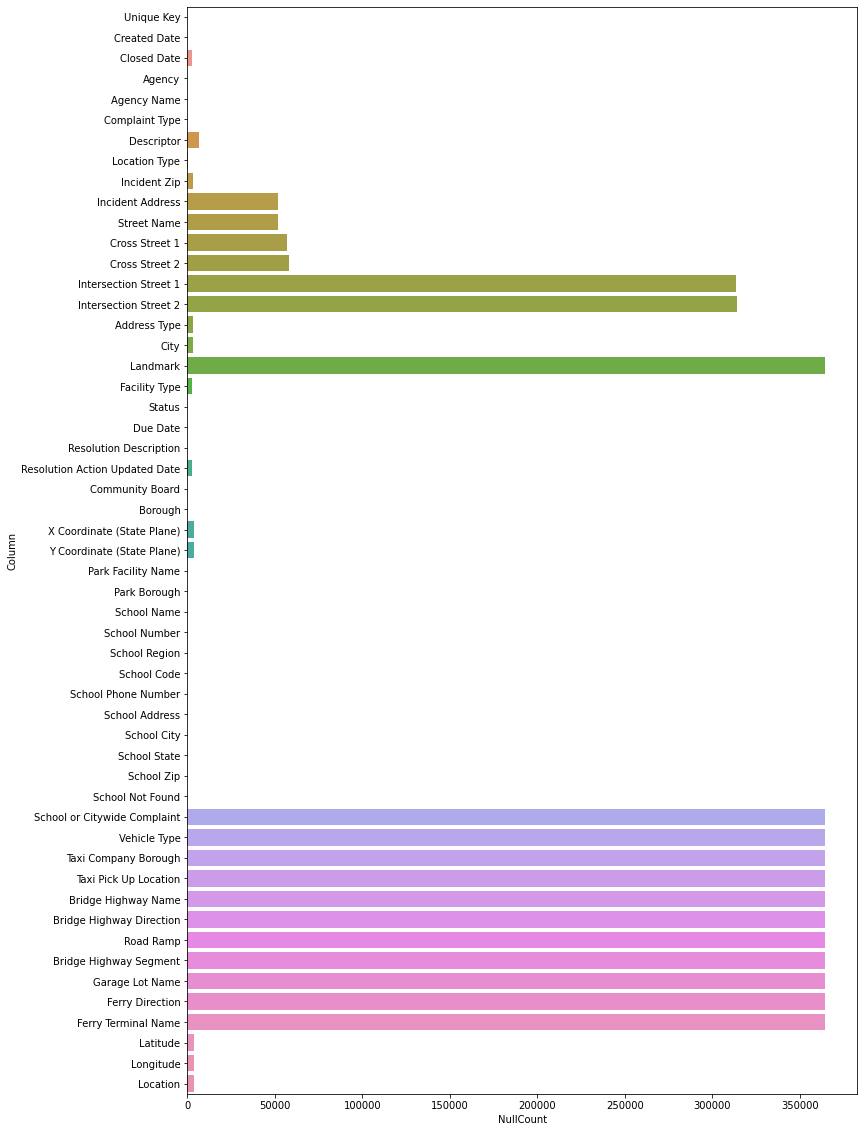

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt

df= pd.DataFrame(data=missing_1)
df.reset_index(inplace=True)
df = df.rename(columns={'index': 'Column', 0: 'NullCount'})
plt.figure(figsize=[12,20])
sb.barplot(df, x='NullCount',y='Column')

## Missing value treatment

### Remove the records whose __Closed Date__ values are null

In [10]:
dataset_2 = dataset_1.dropna(subset=['Closed Date'])
dataset_2 = pd.DataFrame(dataset_2)
np.subtract(dataset_1.shape, dataset_2.shape)

array([2381,    0])

<div class="alert alert-block alert-success">
2,381 rows had null Closed dates and were removed in creating dataframe dataset_2.
</div>

## Analyze the date column, and remove entries that have an incorrect timeline

In [11]:
dataset_2['Created Date']=pd.to_datetime(dataset_2['Created Date'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
dataset_2['Closed Date']=pd.to_datetime(dataset_2['Closed Date'], format='%m/%d/%Y %I:%M:%S %p')

In [13]:
dataset_2['Due Date']=pd.to_datetime(dataset_2['Due Date'], format='%m/%d/%Y %I:%M:%S %p')

In [14]:
dataset_2['Resolution Action Updated Date']=pd.to_datetime(dataset_2['Resolution Action Updated Date'], format='%m/%d/%Y %I:%M:%S %p')

In [15]:
mask = dataset_2['Created Date'] > dataset_2['Closed Date']
dataset_2.loc[mask]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [16]:
mask_2 = dataset_2['Created Date'] > dataset_2['Resolution Action Updated Date']
dataset_2.loc[mask_2]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


In [17]:
mask_3 = dataset_2['Created Date'] > dataset_2['Due Date']
dataset_2.loc[mask_3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


<div class="alert alert-block alert-success">
Reformatted all the date columns into datetime objects and checked to see if Created Date  > Due Date, Resoultion Action Updated Date and the Closed Date for timeline sake. Could not find any issues, so we will move forward as is without removing entries.
</div>

### Calculate the time elapsed in closed and creation date

In [18]:
dataset_2['Time Elapsed'] = pd.to_timedelta(dataset_2['Closed Date']-dataset_2['Created Date'])
dataset_2['Time Elapsed'] 

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Name: Time Elapsed, Length: 362177, dtype: timedelta64[ns]

### Convert the calculated date to seconds to get a better representation

In [19]:
dataset_2['Time Elapsed Seconds'] = dataset_2['Time Elapsed'].dt.total_seconds()
dataset_2['Time Elapsed Seconds']

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Name: Time Elapsed Seconds, Length: 362177, dtype: float64

### View the descriptive statistics for the newly created column

In [20]:
dataset_2['Time Elapsed Seconds'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Time Elapsed Seconds, dtype: float64

### Check the number of null values in the __Complaint_Type__ and __City__ columns

In [21]:
dataset_2['Complaint Type'].isna().sum()

0

In [22]:
dataset_2['City'].isna().sum()

674

<div class="alert alert-block alert-success">
No null Complaint Types, but there are 674 null City entries.
</div>

### Impute the NA value with __Unknown City__

In [23]:
dataset_2['City'].fillna('Unknown City', inplace=True)
dataset_2['City'].isna().sum()

0

In [24]:
len(dataset_2[dataset_2['City']=='Unknown City'])

674

<div class="alert alert-block alert-success">
The 674 null City entries have been reduced to 0.
</div>

### Draw a frequency plot for the complaints in each city

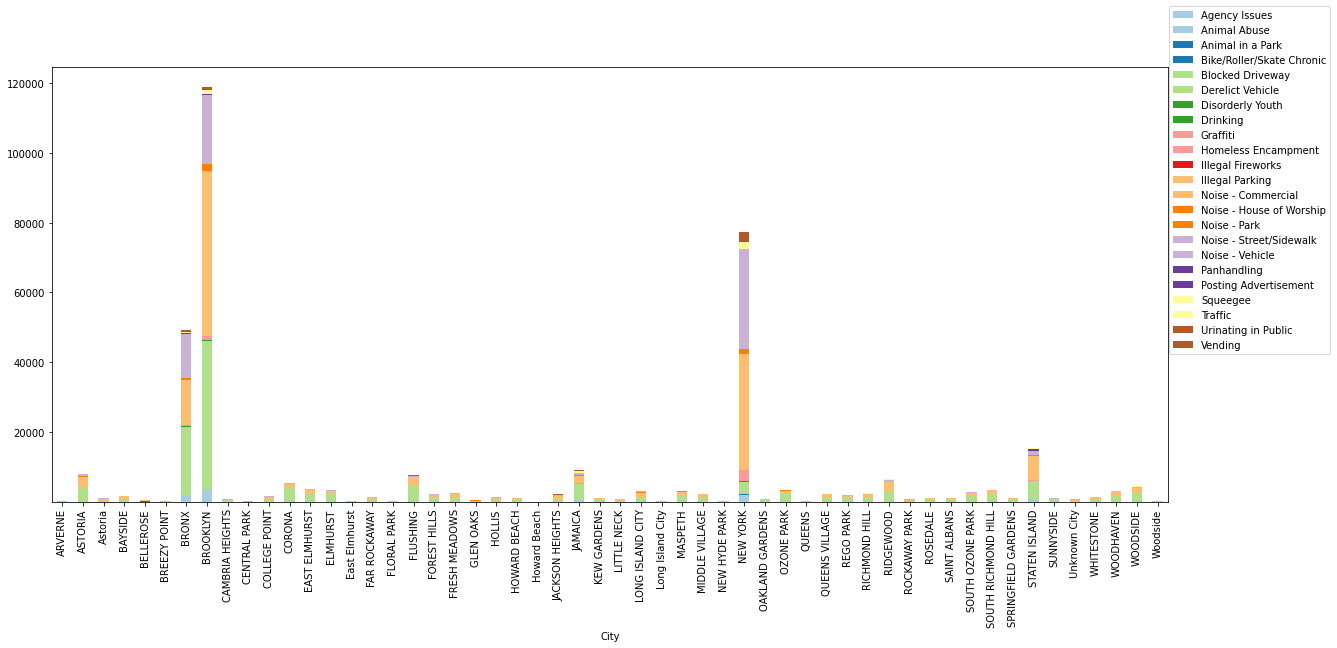

In [25]:
crosstab = pd.crosstab(index=dataset_2['City'], columns=dataset_2['Complaint Type'])
crosstab

crosstab.plot(kind="bar", figsize=(20,8), stacked=True, colormap='Paired')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))


<div class="alert alert-block alert-success">
Brooklyn, New York, and Bronx have the highest numbers of complaints, significantly higher than other cities.
</div>

### Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

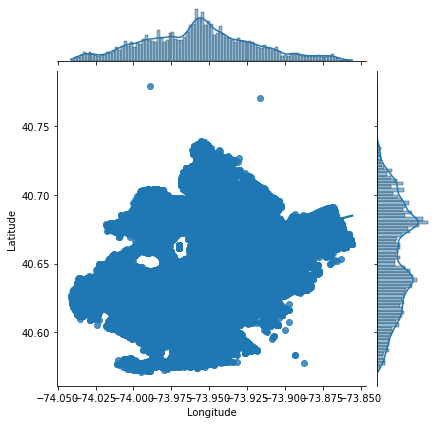

In [26]:
df_bkn = dataset_2.loc[dataset_2['City']=='BROOKLYN']
sb.jointplot(x = 'Longitude', y = 'Latitude', data=df_bkn, kind='reg')

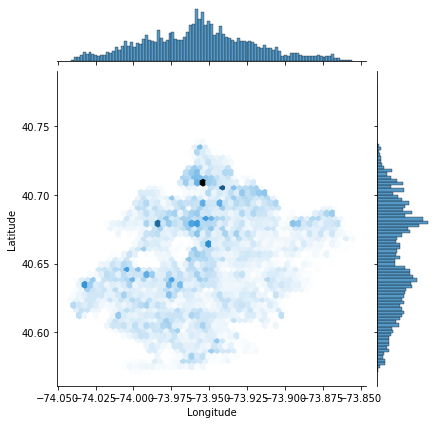

In [27]:
sb.jointplot(x = 'Longitude', y = 'Latitude', data=df_bkn, kind='hex')

<div class="alert alert-block alert-success">
There seems to be a higher concentration of complaints in the North/Central area of Brooklyn.
</div>

# __Find major types of complaints:__

In [28]:
complaints = dataset_2['Complaint Type'].value_counts()
complaints

Blocked Driveway             100624
Illegal Parking               91716
Noise - Street/Sidewalk       51139
Noise - Commercial            43751
Derelict Vehicle              21518
Noise - Vehicle               19301
Animal Abuse                  10530
Traffic                        5196
Homeless Encampment            4879
Vending                        4185
Noise - Park                   4089
Drinking                       1404
Noise - House of Worship       1068
Posting Advertisement           679
Urinating in Public             641
Bike/Roller/Skate Chronic       475
Panhandling                     325
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<div class="alert alert-block alert-success">
Blocked driveway has the most complaints followed by illegal parking, then Noise compaints, and then vehicle compaints. It tapers off from animal abuse down.
</div>

## Plot a bar graph to show the types of complaints

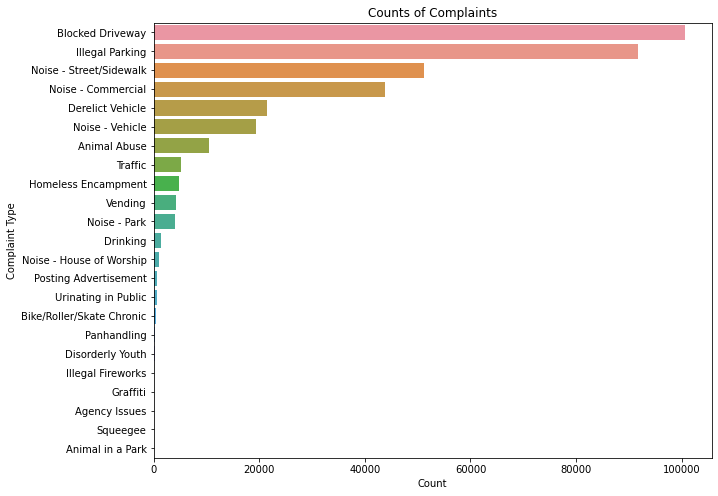

In [29]:
complaints = dataset_2['Complaint Type'].value_counts()
plt.figure(figsize=(10, 8))
ax = sb.barplot(x=complaints.values, y=complaints.index)
plt.title('Counts of Complaints')
plt.xlabel('Count')
plt.ylabel('Complaint Type')
plt.show()

## Check the frequency of various types of complaints for New York City

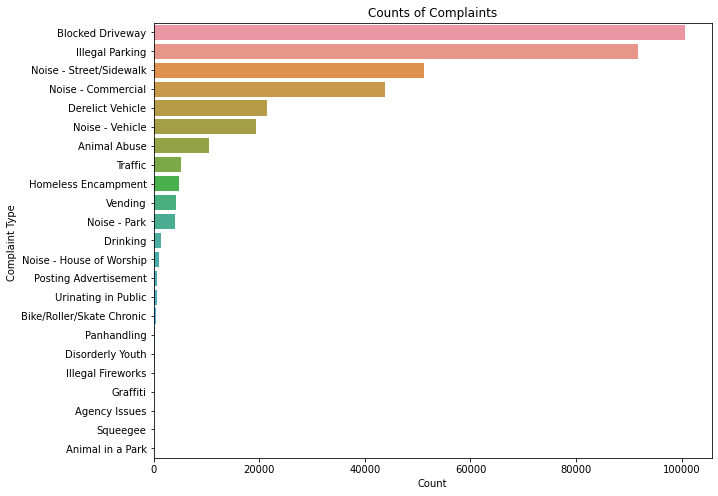

In [30]:
complaints = dataset_2['Complaint Type'].value_counts()
plt.figure(figsize=(10, 8))
ax = sb.barplot(x=complaints.values, y=complaints.index)
plt.title('Counts of Complaints')
plt.xlabel('Count')
plt.ylabel('Complaint Type ')
plt.show()

## Find the top 10 complaint types

In [31]:
complaints.head(10)

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

## Display the various types of complaints in each city



In [32]:
pd.set_option('display.max_columns', None)
city_counts = dataset_2.groupby(['City', 'Complaint Type']).size().unstack(fill_value=0)
city_counts

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,0,62,2,14,2,29,10,1,0,0,1,1,1
ASTORIA,0,170,0,16,3436,426,5,43,4,32,4,1340,1653,21,64,409,236,2,3,0,60,10,57
Astoria,0,0,0,0,159,14,0,0,0,0,0,277,310,0,0,145,0,0,0,0,0,0,0
BAYSIDE,0,53,0,0,514,231,2,1,3,2,0,638,47,3,4,17,24,0,0,0,9,0,2
BELLEROSE,0,15,0,1,138,120,2,1,0,1,1,132,38,1,1,13,11,1,1,0,9,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,0,16,4,0,0,1,1,0,0,0,0,0,0
BRONX,0,1971,0,22,17062,2402,66,206,15,275,24,9889,2944,90,548,9144,3556,20,18,0,427,54,433
BROOKLYN,0,3191,0,124,36445,6257,79,291,60,948,61,33532,13855,389,1575,13982,5965,49,58,0,1258,155,575
CAMBRIA HEIGHTS,0,15,0,0,177,148,0,0,0,6,1,113,19,2,0,29,100,0,0,0,7,0,0


<div class="alert alert-block alert-success">
Just realized that there are some data entry/integrity issues duplicating cities. For example there is a "WOODSIDE" and a "Woodside".
</div>

## Create a DataFrame, __df_new__, which contains cities as columns and complaint types in rows




In [33]:
pd.set_option('display.max_columns', None)
df_new = dataset_2.groupby([ 'Complaint Type', 'City']).size().unstack(fill_value=0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,35,104,85,59,0,111,7,191,78,66,5,39,51,0,50,317,26,21,40,0,56,36,1,1941,29,72,1,90,33,55,154,33,44,43,74,40,42,786,40,1,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,0,0,1,2,0,0,0,3,6,0,0,0,1,0,2,3,0,0,3,0,1,1,0,254,2,1,0,0,0,0,3,0,2,0,1,1,0,10,2,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,597,3597,1925,1992,0,383,33,3640,873,682,48,442,215,1,703,3620,429,174,1052,55,1000,663,76,2705,177,1681,3,772,780,1099,2161,80,270,318,1202,1946,330,2845,278,86,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,223,72,136,94,2,215,74,532,71,347,57,162,172,0,41,1132,16,73,220,4,510,366,14,695,117,479,2,478,94,200,507,19,247,248,425,356,267,2184,17,63,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,9,0,2,2,0,2,0,0,81,1,4,0,0,0,0,3,4,0,1,2,2,0,25,2,0,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,1,34,9,13,0,4,1,47,1,2,0,3,4,0,10,40,1,1,8,0,9,2,0,321,2,20,0,5,4,10,10,23,2,3,14,25,6,188,12,3,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,2,4,3,1,0,0,0,6,3,0,0,0,0,0,1,3,0,0,3,0,1,0,0,25,0,0,0,1,1,1,3,0,2,0,2,0,0,6,1,0,1,0,4,0


# __Visualize the major types of complaints in each city__



## Draw another chart that shows the types of complaints in each city in a single chart, where different colors show the different types# of complaints


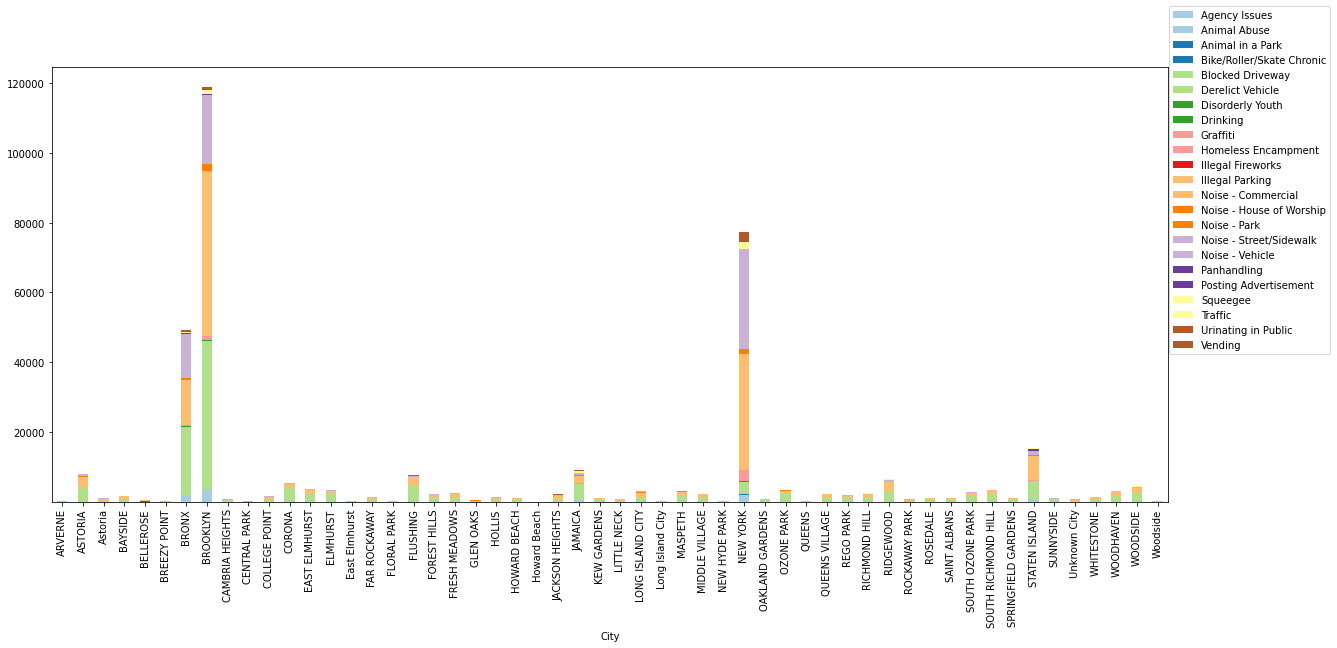

In [34]:
crosstab = pd.crosstab(index=dataset_2['City'], columns=dataset_2['Complaint Type'])
crosstab

crosstab.plot(kind="bar", figsize=(20,8), stacked=True, colormap='Paired')
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.15))


## Sort the complaint types based on the average __Request_Closing_Time__ grouping them for different locations




In [35]:
dataset_2.rename(columns={'Time Elapsed Seconds':'Request_Closing_Time'}, inplace=True)
average_times = dataset_2.groupby(['City', 'Complaint Type'])['Request_Closing_Time'].mean()
average_times = average_times.reset_index()
sorted_data = average_times.sort_values(by=['Request_Closing_Time',], ascending=False)
sorted_data

,City,Complaint Type,Request_Closing_Time
510,QUEENS,Animal in a Park,1212634.0
525,QUEENS VILLAGE,Graffiti,191995.0
63,BELLEROSE,Homeless Encampment,140930.0
653,SOUTH RICHMOND HILL,Bike/Roller/Skate Chronic,111277.0
482,OAKLAND GARDENS,Homeless Encampment,103156.0
...,...,...,...
520,QUEENS,Urinating in Public,1226.0
497,OZONE PARK,Illegal Fireworks,1191.0
170,EAST ELMHURST,Bike/Roller/Skate Chronic,908.0
585,RIDGEWOOD,Posting Advertisement,895.0


## __See whether the average response time across different complaint types is similar (overall)__





In [36]:
average_times_all = dataset_2.groupby(['Complaint Type'])['Request_Closing_Time'].mean()
average_times_all = average_times_all.reset_index()
average_times_all['Request_Closing_Time'] = average_times_all['Request_Closing_Time'].round(2)
all_sorted = average_times_all.sort_values(by='Request_Closing_Time', ascending = False)
all_sorted

,Complaint Type,Request_Closing_Time
2,Animal in a Park,1212634.00
5,Derelict Vehicle,25359.60
8,Graffiti,23276.34
0,Agency Issues,18289.12
1,Animal Abuse,18032.56
4,Blocked Driveway,16232.52
17,Panhandling,15853.55
11,Illegal Parking,15650.44
9,Homeless Encampment,15451.38
19,Squeegee,14560.25


<div class="alert alert-block alert-success">
Illegal fireworks, posting ads & noise complaints have faster response times compared to animal control and derelict vehicles. Average responses can vary from 2 hours to 2 weeks! If building a model, we might want to consider how to handle "Animal in the Park" as it can be skewing results having the least number of complaints as well.
</div>

## Visualize the average of __Request_Closing_Time__

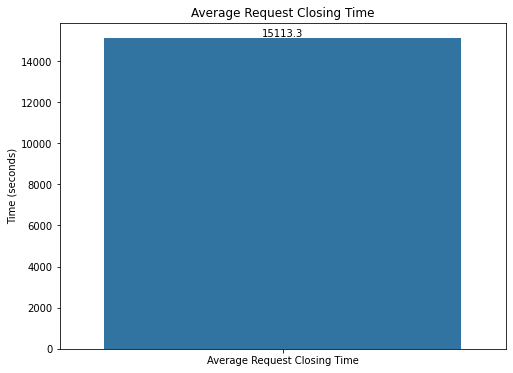

In [37]:
avg_closing_time = dataset_2['Request_Closing_Time'].mean()

plt.figure(figsize=(8, 6))
ax = sb.barplot(x=['Average Request Closing Time'], y=[avg_closing_time])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Average Request Closing Time')
plt.ylabel('Time (seconds)')
plt.show()

## __Identify the significant variables by performing statistical analysis using p-values__




<div class="alert alert-block alert-success">
We're going to focus on request close time, and how each of these variables can impact it. For numerical, we'll use the close times. For categorical variables, we'll pair up each variable against close times by making a new column that buckets the close times to above or below average.
</div>

In [38]:
import scipy.stats as stats

cat_df = dataset_2.select_dtypes(include=['object'])
cat_df['Request_Closing_Time'] = dataset_2['Request_Closing_Time']
cat_df.drop('Request_Closing_Time', axis=1)
average = dataset_2['Request_Closing_Time'].mean()
cat_df['Above_Average'] = cat_df['Request_Closing_Time'] > average

columns_with_few_unique = cat_df.columns[cat_df.nunique() < 1000]
# Having a large number of unique values as a category column will crash Python environment when running loop script.
# This may indicate the need to better categorize the variable using encoding, but for now just exclude them.

for column in columns_with_few_unique:
    crosstab = pd.crosstab(index=cat_df['Above_Average'],columns=cat_df[column])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab.values)
    print(f"Crosstab for '{column}': \n{crosstab}\nChi-Squared {chi2} \nP-Value {p}\nDeg of Freedom {dof}\n")


Crosstab for 'Agency': 
Agency           NYPD
Above_Average        
False          242948
True           119229
Chi-Squared 0.0 
P-Value 1.0
Deg of Freedom 0

Crosstab for 'Agency Name': 
Agency Name    Internal Affairs Bureau  NYPD  New York City Police Department
Above_Average                                                                
False                                4     0                           242944
True                                 4     1                           119224
Chi-Squared 3.0945464408398795 
P-Value 0.21282751705190806
Deg of Freedom 2

Crosstab for 'Complaint Type': 
Complaint Type  Agency Issues  Animal Abuse  Animal in a Park  \
Above_Average                                                   
False                       4          6340                 0   
True                        4          4190                 1   

Complaint Type  Bike/Roller/Skate Chronic  Blocked Driveway  Derelict Vehicle  \
Above_Average                                   

<div class="alert alert-block alert-success">
The following columns had P-Values < 0.05 and may be considered significant.
'Borough'
'Community Board'
'Resolution Description'
'Status'
'Landmark'
'City'
'Location Type'
'Descriptor'
'Complaint Type'
</div>

In [39]:
num_df = dataset_2.select_dtypes(include=['number'])
num_df = num_df.dropna(axis=1, how='all')

corr = num_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time
Unique Key,1.000000,-0.008467,-0.018915,-0.004755,-0.004741,-0.018925,0.064800
Incident Zip,-0.008467,1.000000,0.395459,-0.489265,-0.489523,0.394804,0.054433
X Coordinate (State Plane),-0.018915,0.395459,1.000000,0.373615,0.373100,0.999999,0.105606
Y Coordinate (State Plane),-0.004755,-0.489265,0.373615,1.000000,1.000000,0.374572,0.027300
Latitude,-0.004741,-0.489523,0.373100,1.000000,1.000000,0.374056,0.027220
Longitude,-0.018925,0.394804,0.999999,0.374572,0.374056,1.000000,0.105678
Request_Closing_Time,0.064800,0.054433,0.105606,0.027300,0.027220,0.105678,1.000000


<div class="alert alert-block alert-success">
There were some strong correlations between x coordinate, y coordinate and longitude, latitude, but those were because they are practically identical columns. Also those same fields are correlated to zip codes since they are all location based in that they could be mapped to each other. Longitude had the highest correllation to the close times, but not a strong correlation at 0.105678 barely beating the almost identical x coordinate.
</div>

# __Perform a Kruskal-Wallis H test__




### Fail to reject H0: All sample distributions are equal

### Reject H0: One or more sample distributions are not equal




<div class="alert alert-block alert-success">
Of the numerical groups, longitude was identified as having the strongest correlation to request close time, so we will compare that for the KW H Test. I also included Incident Zip as that had the second highest correlation.
   </div>

In [40]:
from scipy.stats import kruskal

select_kwt = ['Request_Closing_Time','Longitude','Incident Zip']
kwt = dataset_2[select_kwt]
kwt_clean = kwt.dropna()

statistic, p_value = kruskal(kwt_clean['Request_Closing_Time'], kwt_clean['Longitude'], kwt_clean['Incident Zip'])

print("Kruskal-Wallis H statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H0: One or more sample distributions are not equal")
else:
    print("Fail to reject H0: All sample distributions are equal")

Kruskal-Wallis H statistic: 722839.9921099592
P-value: 0.0
Reject H0: One or more sample distributions are not equal


<div class="alert alert-block alert-success">
In this experiment, we reject the null as there is a significant relationship between closing time, longitude and zip codes.
   </div>